# Daily and Total Deaths by State

In [12]:
import numpy as np
import pandas as pd
import plotly.express as px

### Getting raw data from scratch

In [13]:
hist_df = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')
hist_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200514,AK,387.0,31375.0,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,31762,31762,31762,2,0.0,0.0,1109.0,4.0,1113.0
1,20200514,AL,10968.0,131017.0,NaN,NaN,1350.0,NaN,489.0,NaN,...,1350.0,141985,141985,141985,1,18.0,33.0,5262.0,351.0,5613.0
2,20200514,AR,4236.0,71582.0,NaN,64.0,509.0,NaN,NaN,13.0,...,509.0,75818,75818,75818,5,2.0,12.0,2531.0,72.0,2603.0
3,20200514,AS,0.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,105,105,105,60,0.0,0.0,0.0,0.0,0.0
4,20200514,AZ,12674.0,121664.0,NaN,781.0,1636.0,323.0,NaN,201.0,...,1636.0,134338,134338,134338,4,30.0,46.0,6090.0,498.0,6588.0


In [15]:
hist_df['date'] = pd.to_datetime(hist_df['date'], format='%Y%m%d')

In [16]:
hist_df = hist_df[['date', 'state', 'dateChecked', 'death', 'total']].copy()

In [17]:
def plot_from_input(state):
    # Filters columns
    state_df = hist_df[['date', 'state', 'death']].copy()
    # Extract state only
    state_df = state_df[state_df['state'] == state].copy()
    # Sort values
    state_df = state_df.sort_values('date')
    # Gets daily
    state_df['daily'] = state_df['death'].diff()
    return state_df

In [19]:
state_mask = hist_df['']
hist_df['death']

,date,state,dateChecked,death,total
0,2020-05-14,AK,2020-05-14T20:00:00Z,10.0,31762
1,2020-05-14,AL,2020-05-14T20:00:00Z,467.0,141985
2,2020-05-14,AR,2020-05-14T20:00:00Z,97.0,75818
3,2020-05-14,AS,2020-05-14T20:00:00Z,0.0,105
4,2020-05-14,AZ,2020-05-14T20:00:00Z,624.0,134338
...,...,...,...,...,...
3932,2020-01-26,WA,2020-01-26T21:00:00Z,NaN,1
3933,2020-01-25,WA,2020-01-25T21:00:00Z,NaN,1
3934,2020-01-24,WA,2020-01-24T21:00:00Z,NaN,1
3935,2020-01-23,WA,2020-01-23T21:00:00Z,NaN,1


In [6]:
my_state = input()

 CA


In [7]:
test_df = plot_from_input(my_state)

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis

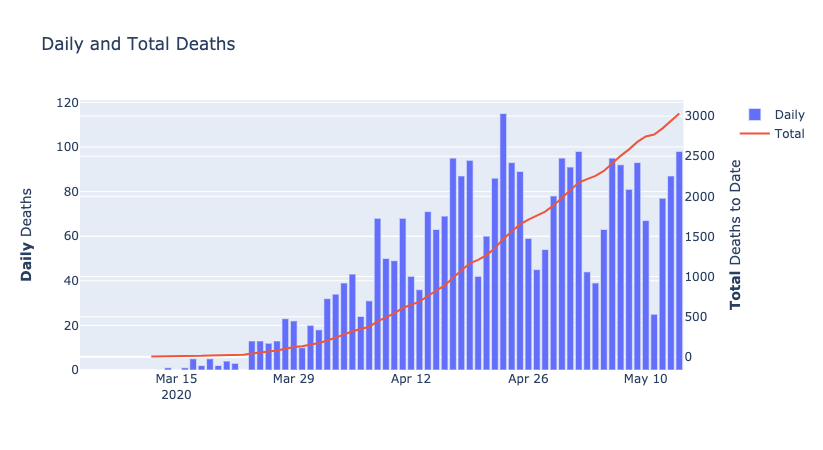

In [26]:
scatter_deaths_states("WY")

In [24]:

def scatter_deaths_states(state):
    state_mask = [test_df['state'] == state]

    fig = go.Figure()

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.update_layout(title_text="Daily and Total Deaths")

    fig.add_trace(go.Bar(x=test_df['date'],
            y=test_df['daily'], name="Daily"), secondary_y=False,
        )

    fig.add_trace(go.Scatter(x=test_df['date'],
            y=test_df['death'], name="Total"), secondary_y=True,
        )

    fig.update_yaxes(title_text="<b>Daily</b> Deaths", secondary_y=False)
    fig.update_yaxes(title_text="<b>Total</b> Deaths to Date", secondary_y=True)



    return fig.sho
    
'''  fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="State",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="GA",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 100, "t": 0},
            showactive=True,
            x=0.4,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)'''

'  fig.update_layout(\n    updatemenus=[\n        dict(\n            buttons=list([\n                dict(\n                    args=["type", "surface"],\n                    label="State",\n                    method="restyle"\n                ),\n                dict(\n                    args=["type", "heatmap"],\n                    label="GA",\n                    method="restyle"\n                )\n            ]),\n            direction="down",\n            pad={"r": 100, "t": 0},\n            showactive=True,\n            x=0.4,\n            xanchor="left",\n            y=1.1,\n            yanchor="top"\n        ),\n    ]\n)'

In [10]:
import matplotlib.pyplot as plt

In [23]:
density = pd.read_csv('../static/tbl_states.csv')

In [24]:
density.head(3)

,state_name,state,Pop,density,lat,long,Lived,Standard,fips
0,California,CA,39937489,256.3727,36.78,-119.42,711,97,6
1,Texas,TX,29472295,112.8204,31.97,-99.90,505,40,48
2,Florida,FL,21992985,410.1256,27.66,-81.52,400,145,12


In [26]:
test_df.head(3)

,date,state,death,daily
3886,2020-03-04,TX,NaN,NaN
3870,2020-03-05,TX,NaN,NaN
3844,2020-03-06,TX,NaN,NaN
